In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

C:\Users\mohanad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X = mnist.data

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
X_pca = pca.fit_transform(X)
X_pca.shape

(70000, 2)

In [7]:
X_pca

array([[ 122.25500524, -316.27866685],
       [1010.49633361, -289.95499805],
       [ -58.99290341,  393.7632308 ],
       ...,
       [-271.50902274,  590.02126069],
       [-310.22753604, -116.7316127 ],
       [1058.86037934,  -83.43144953]])

In [8]:
y = mnist.target.astype('int')
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int32

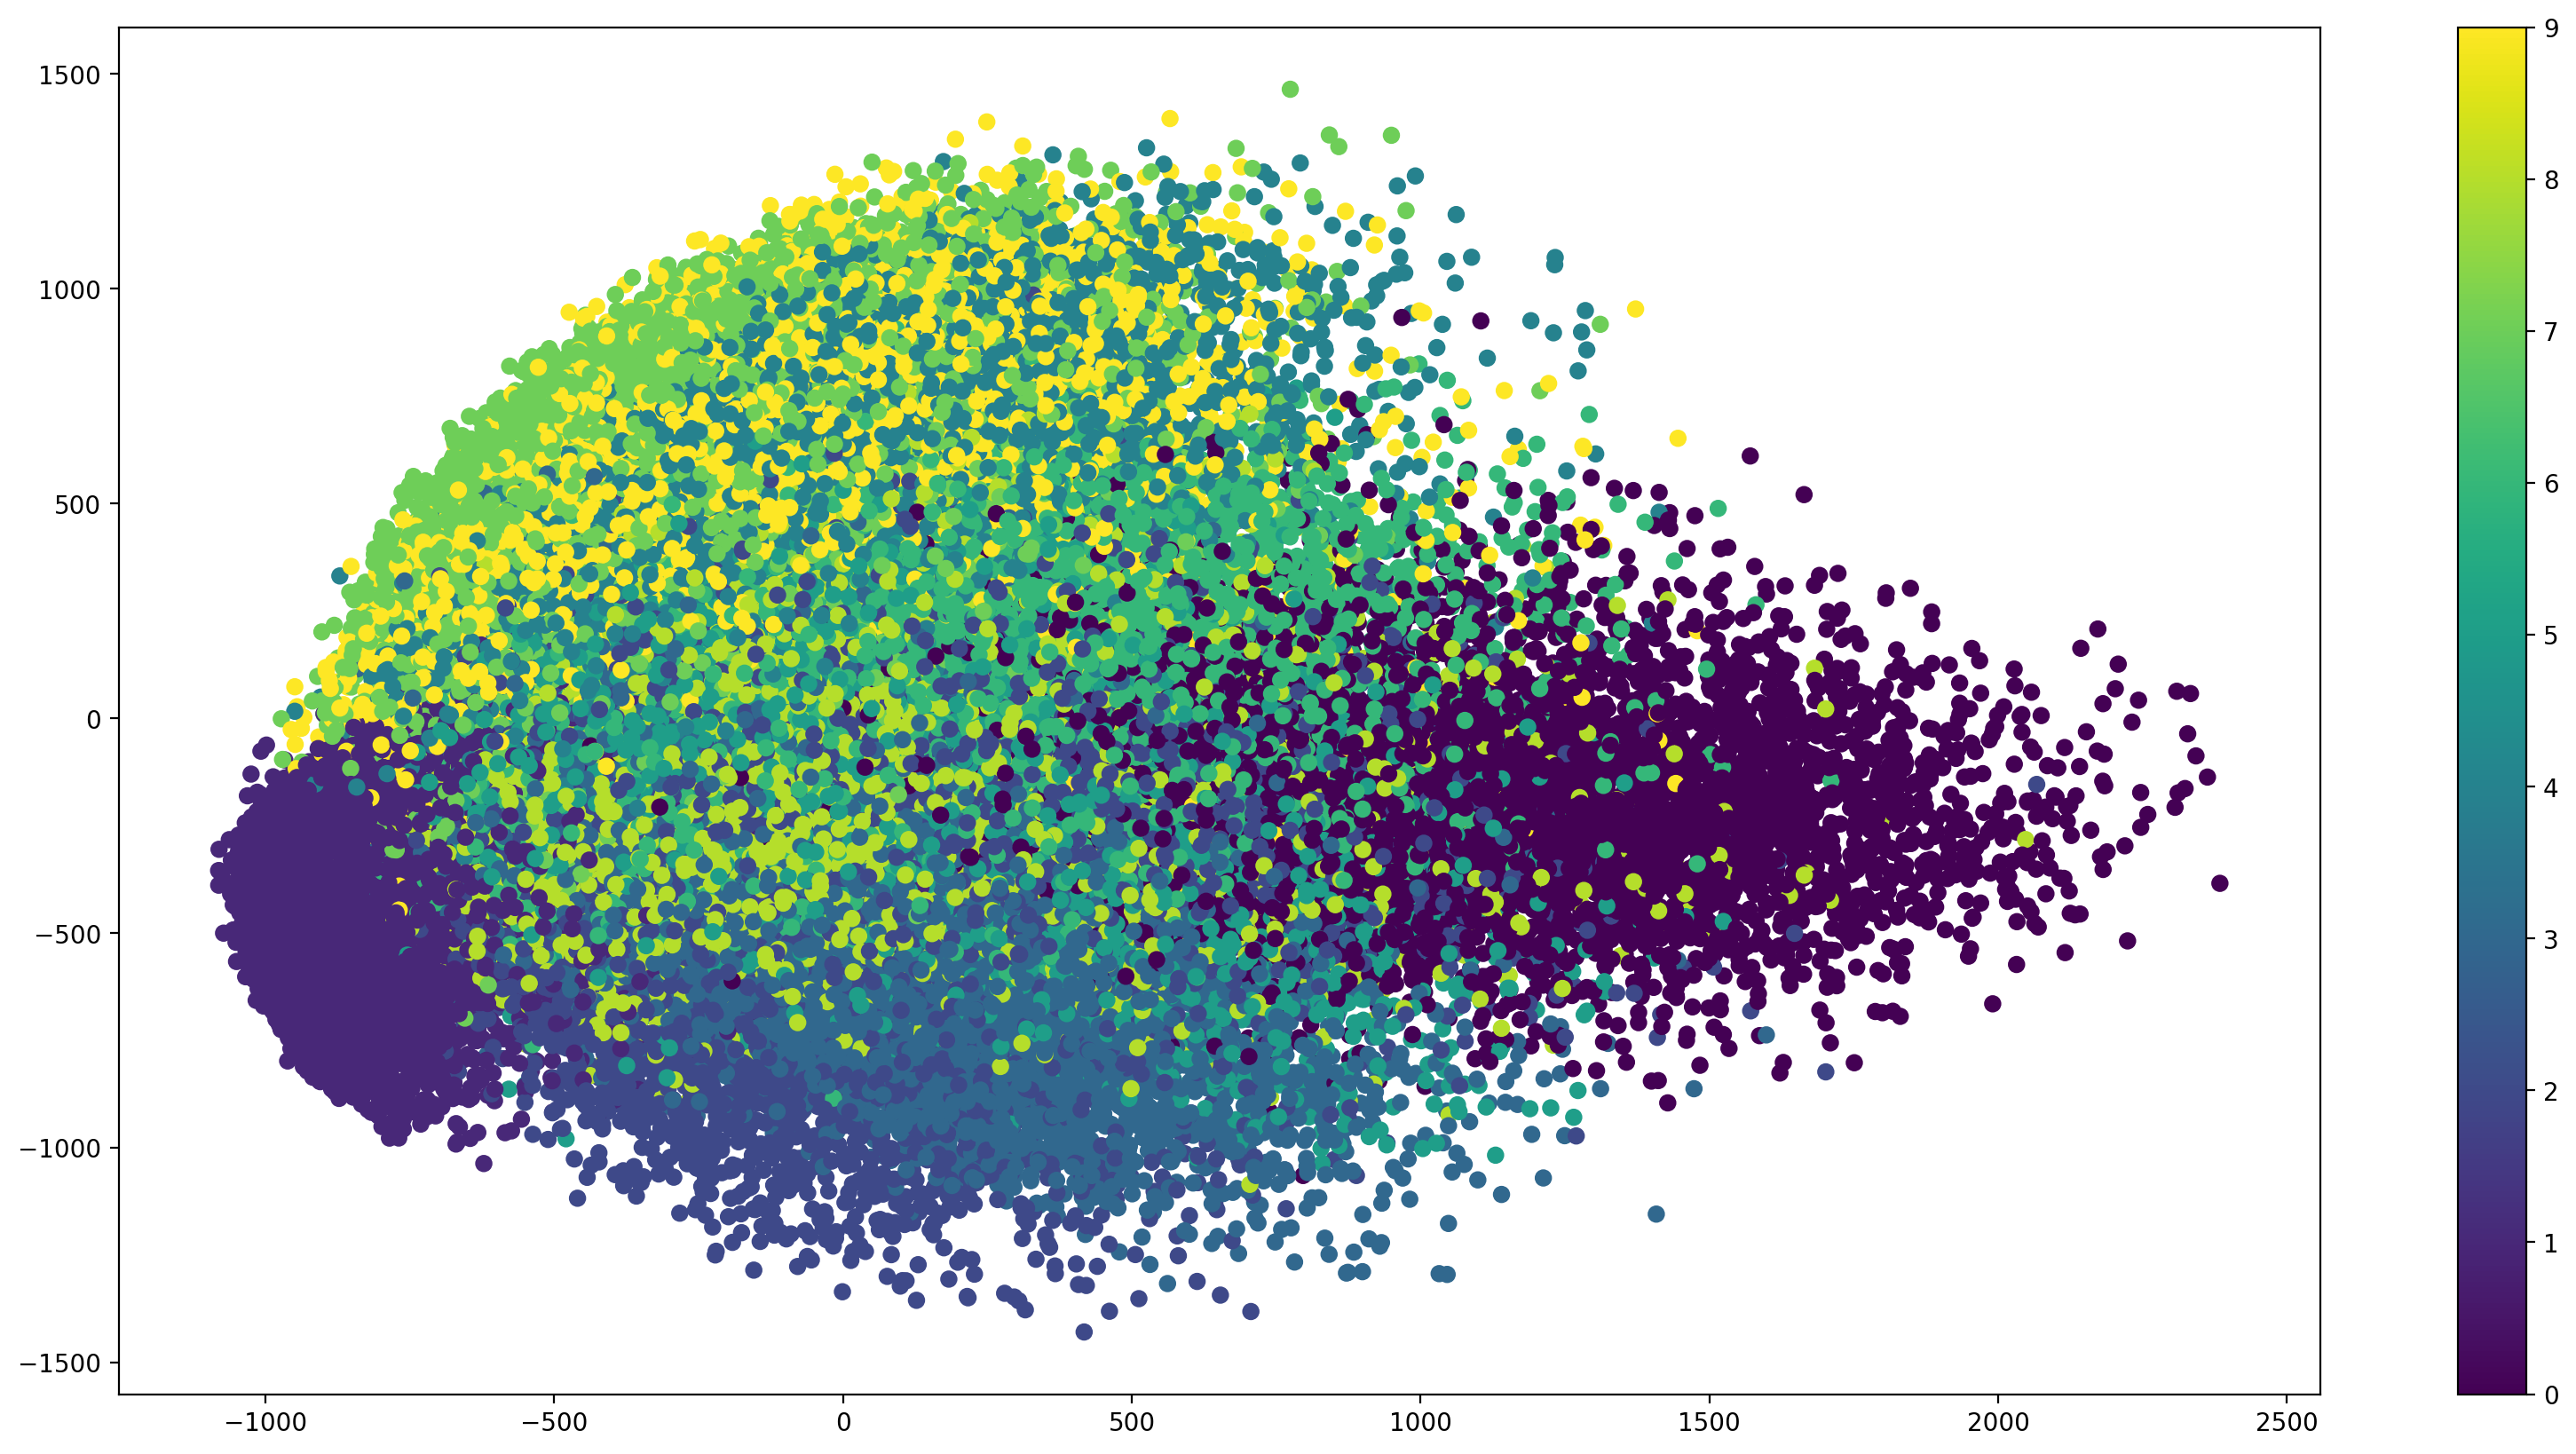

In [9]:
plt.figure(figsize=(20,10), dpi= 200)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= y)
plt.colorbar()
plt.show()

In [10]:
X_recovered = pca.inverse_transform(X_pca)
X_recovered.shape

(70000, 784)

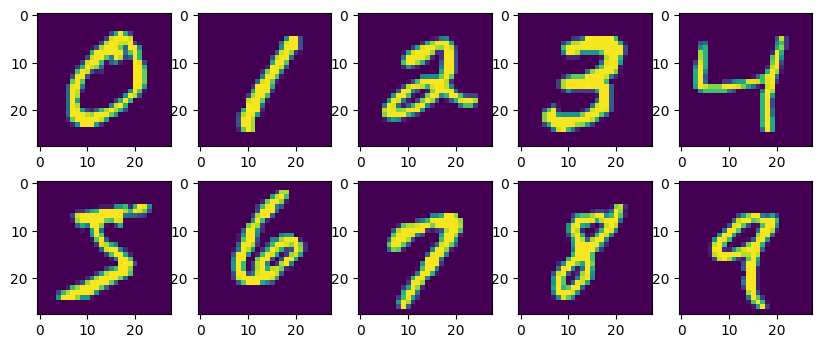

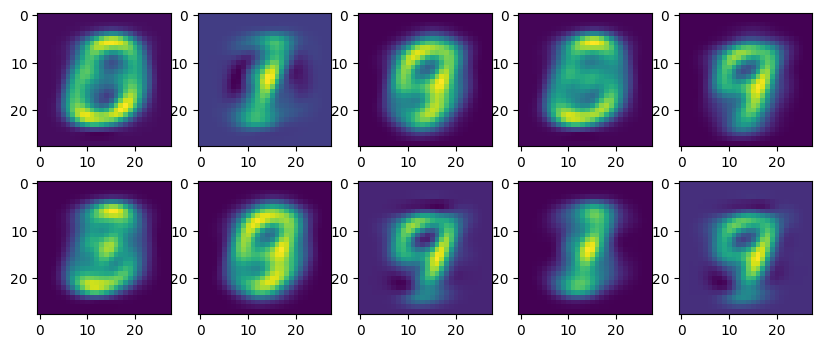

In [11]:
digits = y.unique()
digits.sort()
plt.figure(figsize=(10, 4))
for i in digits:
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[y==i].iloc[0].to_numpy().reshape(28, 28))

plt.figure(figsize=(10, 4))
for i in digits:
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_recovered[y==i][0].reshape(28, 28))

In [12]:
pca = PCA(n_components= 300)
pca.fit(X)
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418217, 0.00396164, 0.00383708,
       0.00375785, 0.00361426, 0.00349025, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287101, 0.00282514,
       0.00269423, 0.00268392, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206317, 0.00202781, 0.00195035, 0.00191471, 0.0018855 ,
       0.00186976, 0.00180104, 0.00176787, 0.00173359, 0.00164

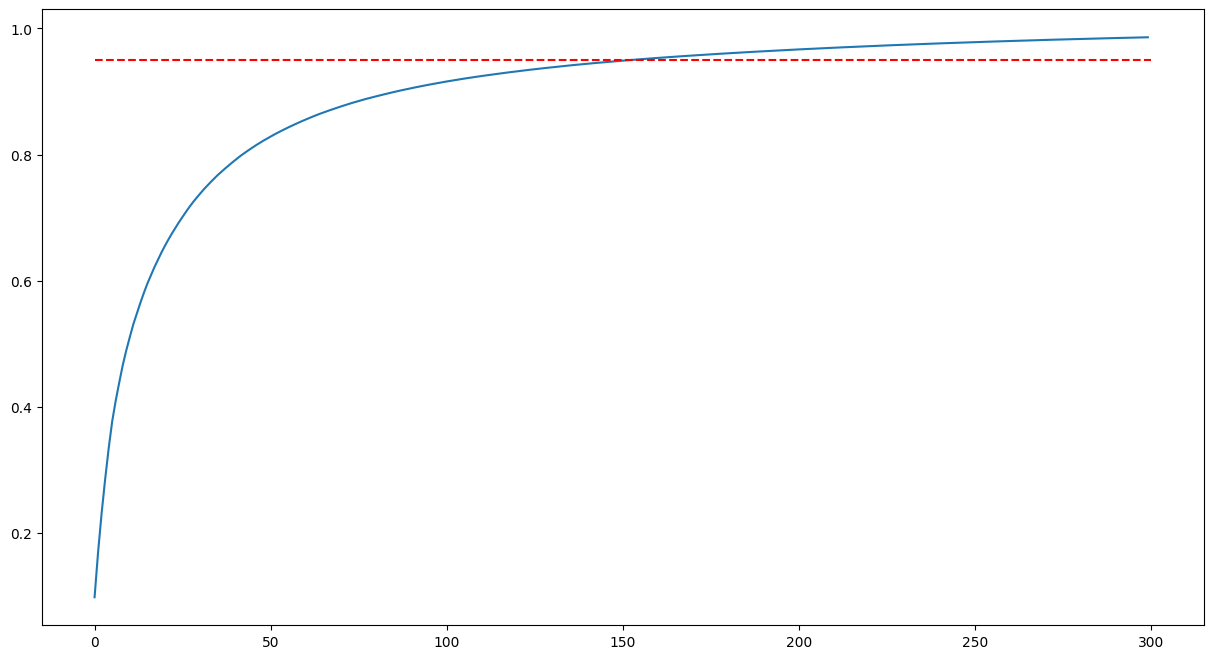

In [13]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(15, 8))
plt.plot(cumsum)
plt.plot([0, 300], [0.95, 0.95], 'r--')

In [14]:
idx = (cumsum <=0.95).sum()
idx

153

In [15]:
pca = PCA(n_components= idx)
pca.fit(X)
pca.explained_variance_ratio_.sum()

0.9494919986895243

In [16]:
X_pca = pca.transform(X)
X_pca.shape

(70000, 153)

In [17]:
X_recovered = pca.inverse_transform(X_pca)
X_recovered.shape

(70000, 784)

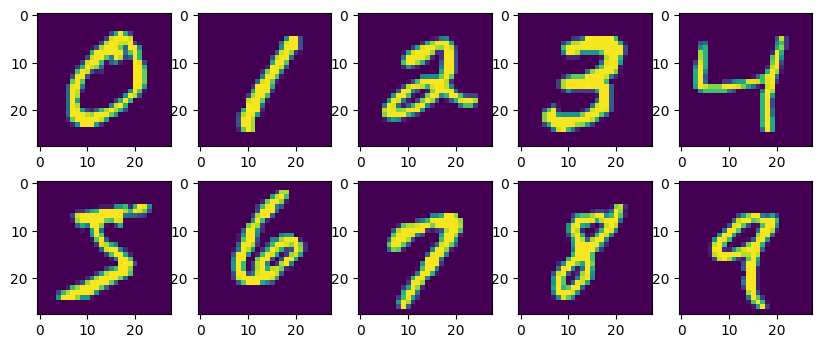

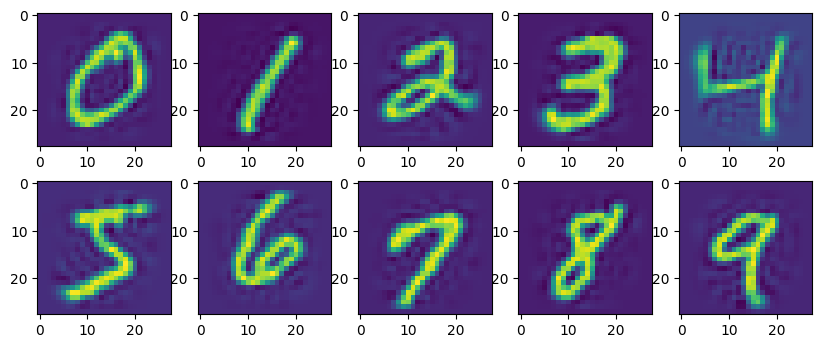

In [18]:
plt.figure(figsize=(10, 4))
for i in digits:
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[y==i].iloc[0].to_numpy().reshape(28, 28))

plt.figure(figsize=(10, 4))
for i in digits:
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_recovered[y==i][0].reshape(28, 28))